<a href="https://colab.research.google.com/github/CrisNakamura/CDC_Diabetes_Health_Indicators/blob/main/Projeto_CDC_Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: CDC Diabetes Health Indicators

## 1. Introdução
Esse projeto visa analisar dados de pacientes e criar um modelo preditivo para identificar a presença de diabetes.

Fonte: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

- Características do Conjunto de Dados: Tabular, Multivariado

- Área Temática: Saúde e Medicina

- Tarefas Associadas: Classificação

- Tipo de Características: Categórico, Inteiro

- Instâncias: 253.680 linhas

- Características (features): 21

## 2. Conhecendo a dataset

Abaixo, um resumo geral sobre os dados dos pacientes.

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><b>ID</b>: ID do paciente</li>
  <li><b>Diabete</b>: 0 = sem diabetes, 1 = pré-diabetes ou diabetes</li>
  <li><b>Pressão alta</b>: 0 = sem pressão alta, 1 = pressão alta</li>
  <li><b>Colesterol alta</b>: 0 = sem colesterol elevado, 1 = colesterol elevado</li>
  <li><b>Exame colesterol</b>: 0 = nenhum exame de colesterol em 5 anos, 1 = sim, exame de colesterol em 5 anos
  <li><b>IMC</b>: Índice de massa corporal</li>
  <li><b>Fumante</b>: Você já fumou pelo menos 100 cigarros em toda a sua vida? [Observação: 5 maços = 100 cigarros] 0 = não, 1 = sim</li>
  <li><b>AVC</b>: Já sofreu AVC? 0 = não, 1 = sim</li>
  <li><b>Doença cardíaca ou ataque cardíaco</b>: doença cardíaca coronariana (CHD) ou infarto do miocárdio (MI) 0 = não, 1 = sim</li>
  <li><b>Atividade física</b>: atividade física nos últimos 30 dias - sem incluir o trabalho. 0 = não, 1 = sim</li>
  <li><b>Frutas</b>: Consumo de frutas 1 ou mais vezes por dia. 0 = não, 1 = sim</li>
  <li><b>Vegetais</b>: Consumo de vegetais 1 ou mais vezes por dia. 0 = não, 1 = sim</li>
  <li><b>Consumo de álcool</b>: Alcoolismo pesados (homens adultos que tomam mais de 14 drinques por semana e mulheres adultas que tomam mais de 7 drinques por semana) 0 = não, 1 = sim</li>
  <li><b>Seguro de Saúde</b>: Tem algum tipo de cobertura de saúde, incluindo seguro de saúde, planos pré-pagos, como HMO, etc. 0 = não, 1 = sim</li>
  <li><b>Problemas em se consultar</b>: Houve algum momento nos últimos 12 meses em que você precisou consultar um médico, mas não pôde por causa do custo? 0 = não, 1 = sim</li>
  <li><b>Saúde em geral</b>: Você diria que, em geral, sua saúde é: escala de 1 a 5 1 = excelente, 2 = muito boa, 3 = boa, 4 = regular, 5 = ruim</li>
  <li><b>Saúde Mental</b>: Agora, pensando em sua saúde mental, que inclui estresse, depressão e problemas com emoções, por quantos dias nos últimos 30 dias sua saúde mental não estava boa? escala 1-30 dias</li>
  <li><b>Saúde Física</b>: Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não estava boa? escala 1-30 dias</li>
  <li><b>Dificuldade de andar</b>: Você tem sérias dificuldades para caminhar ou subir escadas? 0 = não, 1 = sim</li>
  <li><b>Sexo</b>: 0 = mulher, 1 = homem</li>
  <li><b>Idade</b>: Categoria de idade de 13 níveis (_AGEG5YR, consulte o livro de códigos) 1 = 18-24, 9 = 60-64, 13 = 80 ou mais</li>
  <li><b>Escolaridade</b>: Grau de instrução</li>
  <li><b>Renda</b>: Escala de renda escala 1-8: 1 = menos de US 10.000, 5 = menos de US 35.000, 8 = US 75.000 ou mais</li>
</ul>

## 3. Importando as bibliotecas

In [ ]:
# Importando as bibliotecas
import pandas as pd
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## 4. Carregando os dados

In [ ]:
# Importando os dados.
url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
df = pd.read_csv(url)
df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


## 5. Analisando os dados

### 5.1 Análise inicial

In [ ]:
# Verificando o tamanho do dataset.
linha, coluna = df.shape
print(f'linhas: {linha}\ncolunas: {coluna}')

linhas: 253680
colunas: 23


In [ ]:
df.describe()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253679.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

### 5.2 Análise univariada

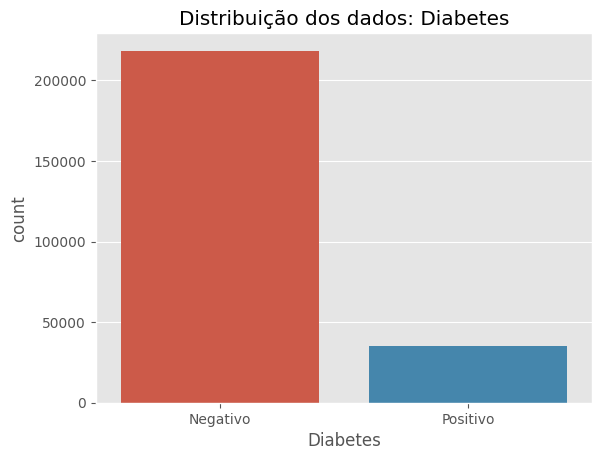

In [ ]:
_ = sns.countplot(x='Diabetes_binary', data=df)
_ = plt.xlabel('Diabetes')
_ = plt.title('Distribuição dos dados: Diabetes')
_ = plt.gca().set_xticklabels(['Negativo', 'Positivo'])

No gráfico acima, podemos notar que maioria dos pacientes que responderam a pergunta da pesquisa não tem diabete.

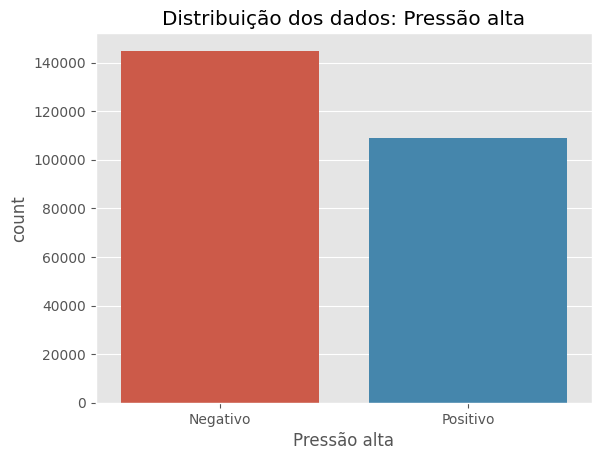

In [ ]:
_ = sns.countplot(x='HighBP', data=df)
_ = plt.xlabel('Pressão alta')
_ = plt.title('Distribuição dos dados: Pressão alta')
_ = plt.gca().set_xticklabels(['Negativo', 'Positivo'])

Ao analisar o gráfico acima, podemos notar que há grande quantidade de pacientes que tem pressão alta. Acreditamos que pressão alta pode ser um fator que contribui a chance de ter diabetes.

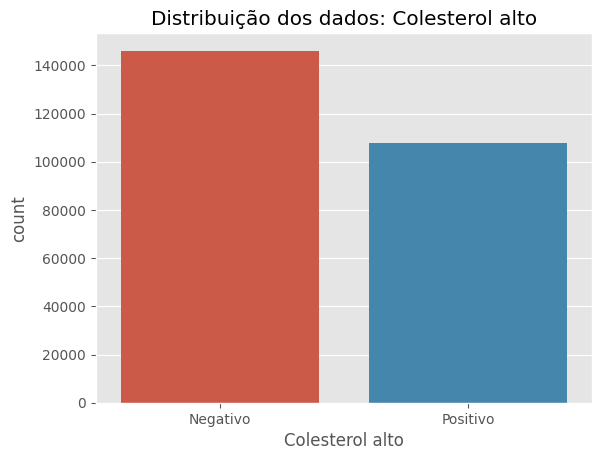

In [ ]:
_ = sns.countplot(x='HighChol', data=df)
_ = plt.xlabel('Colesterol alto')
_ = plt.title('Distribuição dos dados: Colesterol alto')
_ = plt.gca().set_xticklabels(['Negativo', 'Positivo'])

Assim como no caso de pressão, podemos notar que a quantidade de pacientes que tem colesterol alto é razoavelmente grande, o que, sem dúvidas é um fator que contribui para a pressão alta.

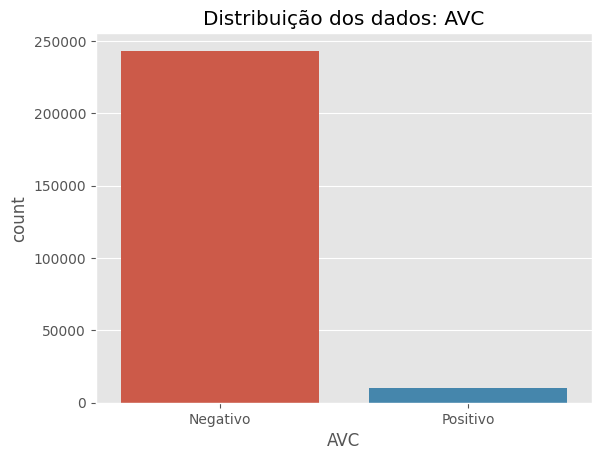

In [ ]:
_ = sns.countplot(x='Stroke', data=df)
_ = plt.xlabel('AVC')
_ = plt.title('Distribuição dos dados: AVC')
_ = plt.gca().set_xticklabels(['Negativo', 'Positivo'])

Ao analisar o gráfico acima, podemos notar que a maioria dos pacientes que responderam a pergunta desta pesquisa nunca tiveram AVC.

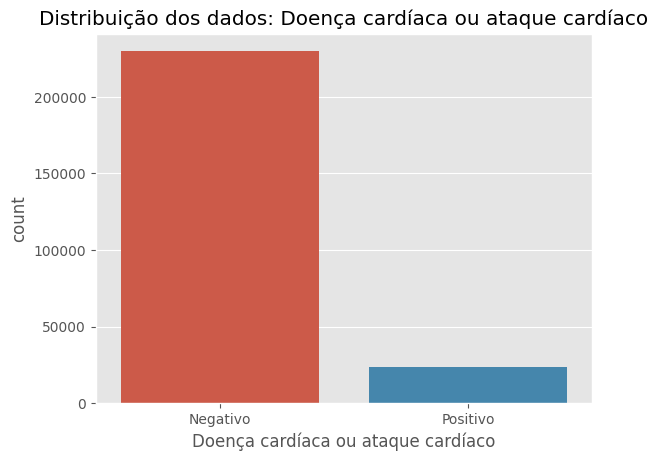

In [ ]:
_ = sns.countplot(x='HeartDiseaseorAttack', data=df)
_ = plt.xlabel('Doença cardíaca ou ataque cardíaco')
_ = plt.title('Distribuição dos dados: Doença cardíaca ou ataque cardíaco')
_ = plt.gca().set_xticklabels(['Negativo', 'Positivo'])

Ao analisar o gráfico acima, podemos notar que a maioria dos pacientes que responderam a pergunta desta pesquisa nunca tiveram sofreram de doença cardíaca.

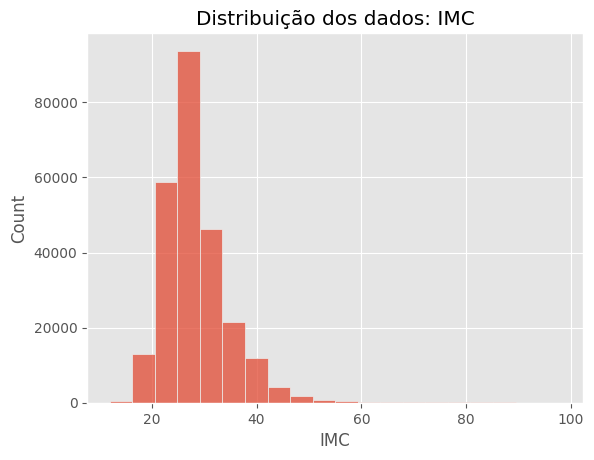

In [27]:
_ = sns.histplot(x='BMI', bins=20, data=df)
_ = plt.xlabel('IMC')
_ = plt.title('Distribuição dos dados: IMC')

Ao analisar o gráfico acima, é perceptível que grande maioria dos pacientes estão na faixa de 20 a 30, o que indica que a maioria dos pacientes podem estar do peso ideal, levemente acima do peso e na faixa de obesidade I.

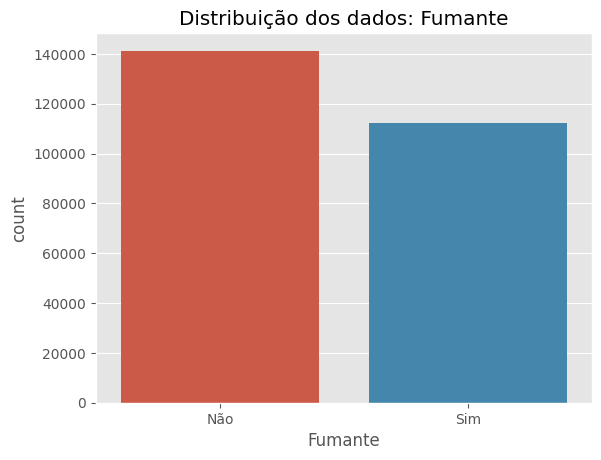

In [ ]:
_ = sns.countplot(x='Smoker', data=df)
_ = plt.xlabel('Fumante')
_ = plt.title('Distribuição dos dados: Fumante')
_ = plt.gca().set_xticklabels(['Não', 'Sim'])

Ao analisar o gráfico acima, podemos notar que há grande quantidade de pacientes que fumam. Acreditamos que pode ser um fator que contribui a chance de ter diabetes.

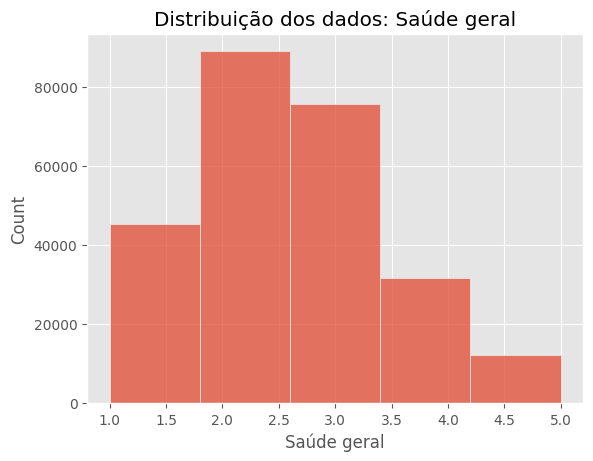

In [30]:
_ = sns.histplot(x='GenHlth', bins=5, data=df)
_ = plt.xlabel('Saúde geral')
_ = plt.title('Distribuição dos dados: Saúde geral')

Ao analisar o gráfico acima, podemos notar que a maioria dos pacientes se consideram com saúde geral muito boa e boa. São poucas pacientes que se consideram com saúde geral ruim.

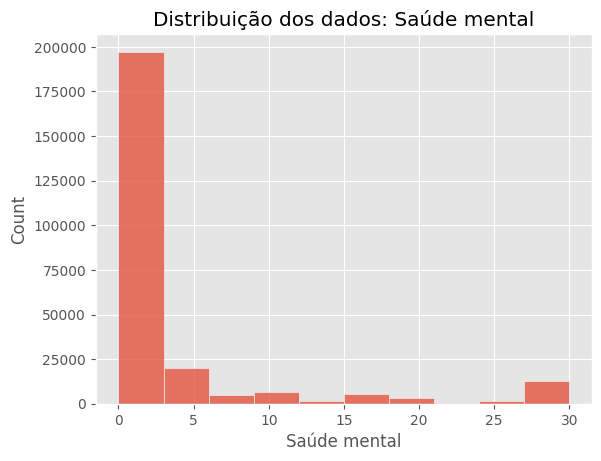

In [34]:
_ = sns.histplot(x='MentHlth', bins=10, data=df)
_ = plt.xlabel('Saúde mental')
_ = plt.title('Distribuição dos dados: Saúde mental')

Ao observar o gráfico acima, é perceptível que a maioria dos pacientes não ficavam bem mentalmente durante 1 a 5 dias. São poucos pacientes que não ficavam bem mentalmente mais do que 5 dias.

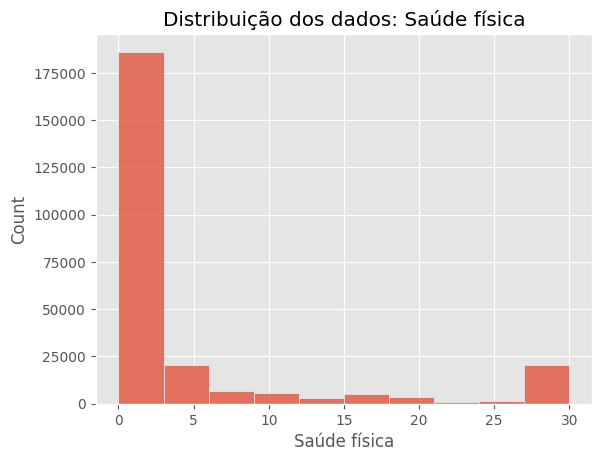

In [35]:
_ = sns.histplot(x='PhysHlth', bins=10, data=df)
_ = plt.xlabel('Saúde física')
_ = plt.title('Distribuição dos dados: Saúde física')

Semelhante ao gráfico anterior, é perceptível que a maioria dos pacientes não ficavam bem fisicamente durante 1 a 5 dias. São poucos pacientes que não ficavam bem fisicamente mais do que 5 dias.

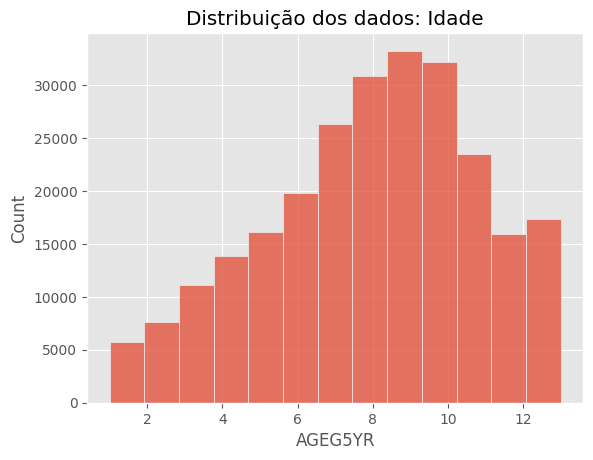

In [ ]:
_ = sns.histplot(x='Age', bins=13, data=df)
_ = plt.xlabel('AGEG5YR')
_ = plt.title('Distribuição dos dados: Idade')

| Número | Idade            |
|--------|------------------|
| 1      | Age 18 - 24      |
| 2      | Age 25 to 29     |
| 3      | Age 30 to 34     |
| 4      | Age 35 to 39     |
| 5      | Age 40 to 44     |
| 6      | Age 45 to 49     |
| 7      | Age 50 to 54     |
| 8      | Age 55 to 59     |
| 9      | Age 60 to 64     |
| 10     | Age 65 to 69     |
| 11     | Age 70 to 74     |
| 12     | Age 75 to 79     |
| 13     | Age 80 or older  |


Ao analisar o gráfico junto com a tabela, podemos notar que a maioria das pacientes que responderam a pesquisa tem a partir de 50 anos em diante.

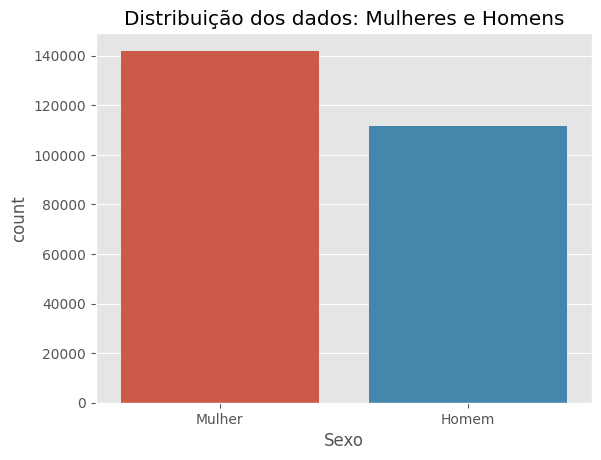

In [ ]:
_ = sns.countplot(x='Sex', data=df)
_ = plt.xlabel('Sexo')
_ = plt.title('Distribuição dos dados: Mulheres e Homens')
_ = plt.gca().set_xticklabels(['Mulher', 'Homem'])

Ao analisar o gráfico, é perceptível que a maioria das pacientes que responderam essa pesquisa é do sexo feminino.

## Implementação de modelo de Machine Learning

In [ ]:
# Atribuindo os features e target.
X = df.drop(columns = ['ID', 'Diabetes_binary'], axis=1)
y = df['Diabetes_binary']